# Catalogue analysis

This notebook contains analysis of the matched catalogue.

In [14]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import fitsio
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
import seaborn as sns

sns.set(style='white', context='poster', rc={'figure.figsize': (11, 8)})

In [15]:
cat = fitsio.read('../zlp-stitch/wasp19b-802.fits', 'catalogue')

## Proper motion

In [16]:
pmra = cat['pmRA'] / 1000.
pmdec = cat['pmDE'] / 1000.
dec = np.radians(cat['DEC'])
jmag = cat['Jmag']
hmag = cat['Hmag']

In [17]:
jmh = jmag - hmag
pm = np.sqrt(pmdec ** 2 + pmra ** 2 * np.cos(dec) ** 2)
H = jmag + 5 + 5 * np.log(pm)

In [18]:
bins, ledges, redges = np.histogram2d(jmh, H, 25, range=((-0.2, 1.2), (-14, 11)), normed=True)

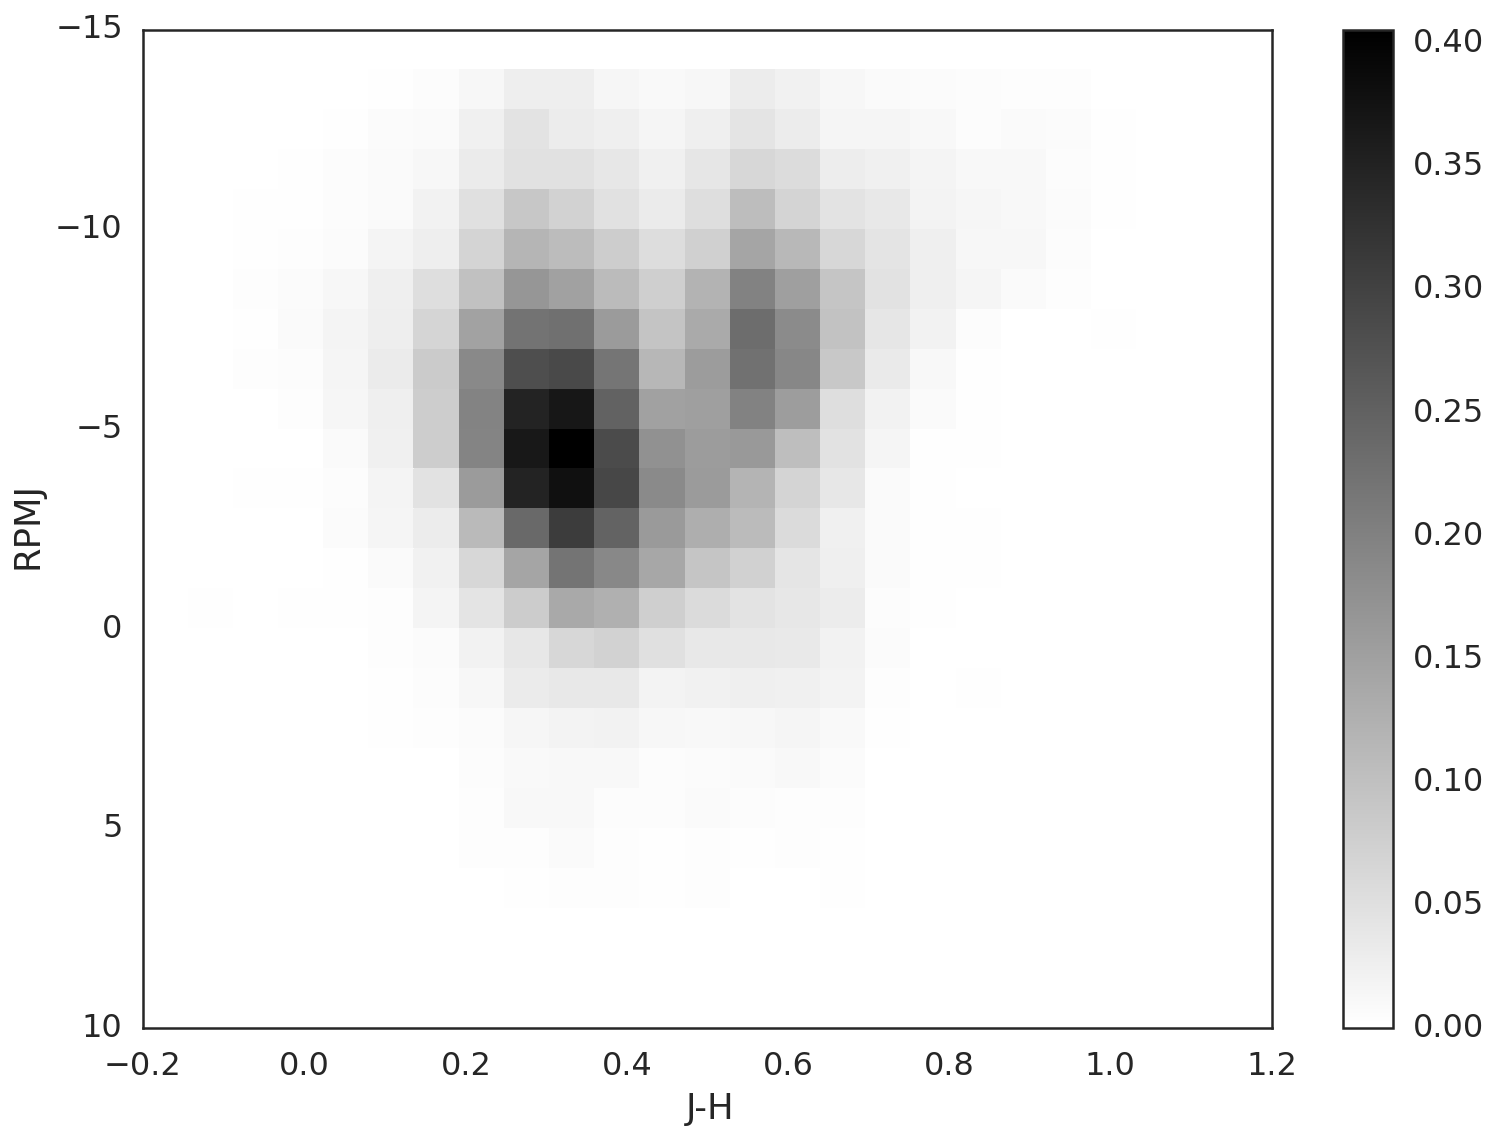

In [19]:
plt.pcolormesh(ledges[:-1], redges[:-1], bins.T, cmap=plt.cm.binary)
plt.grid(False)
plt.gca().invert_yaxis()
plt.colorbar()
plt.xlabel(r'J-H')
plt.ylabel(r'RPMJ')
plt.tight_layout()

## Object classes

In [20]:
from collections import defaultdict
counter = defaultdict(int)
for t in cat['otype']:
    t = t.strip()
    if t != 'nan':
        counter[t] += 1

In [21]:
x, y = zip(*list(counter.iteritems()))
ind = np.argsort(y)[::-1]
x, y = [np.array(data)[ind] for data in [x, y]]
xbins = np.arange(len(x))

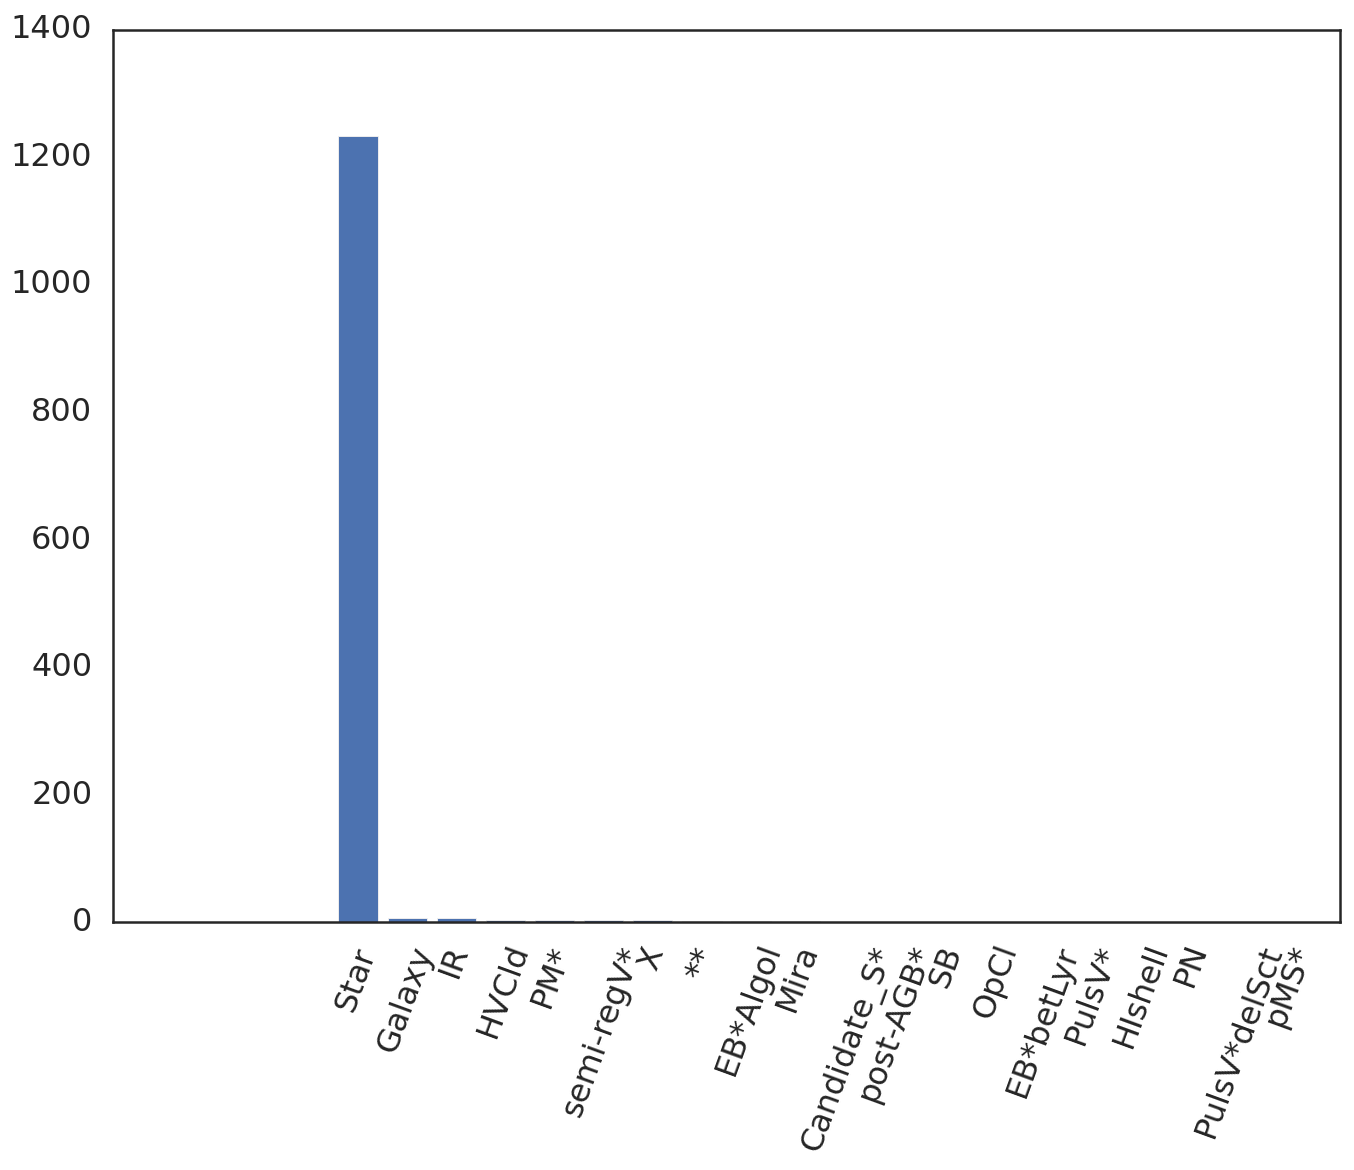

In [22]:
plt.bar(xbins, y, align='center')
plt.xticks(xbins, x, rotation=70);

## Photometry analysis

In [23]:
flux_mean = cat['FLUX_MEAN']
r2mag = cat['R2mag']

 
-0.2837 x + 7.302


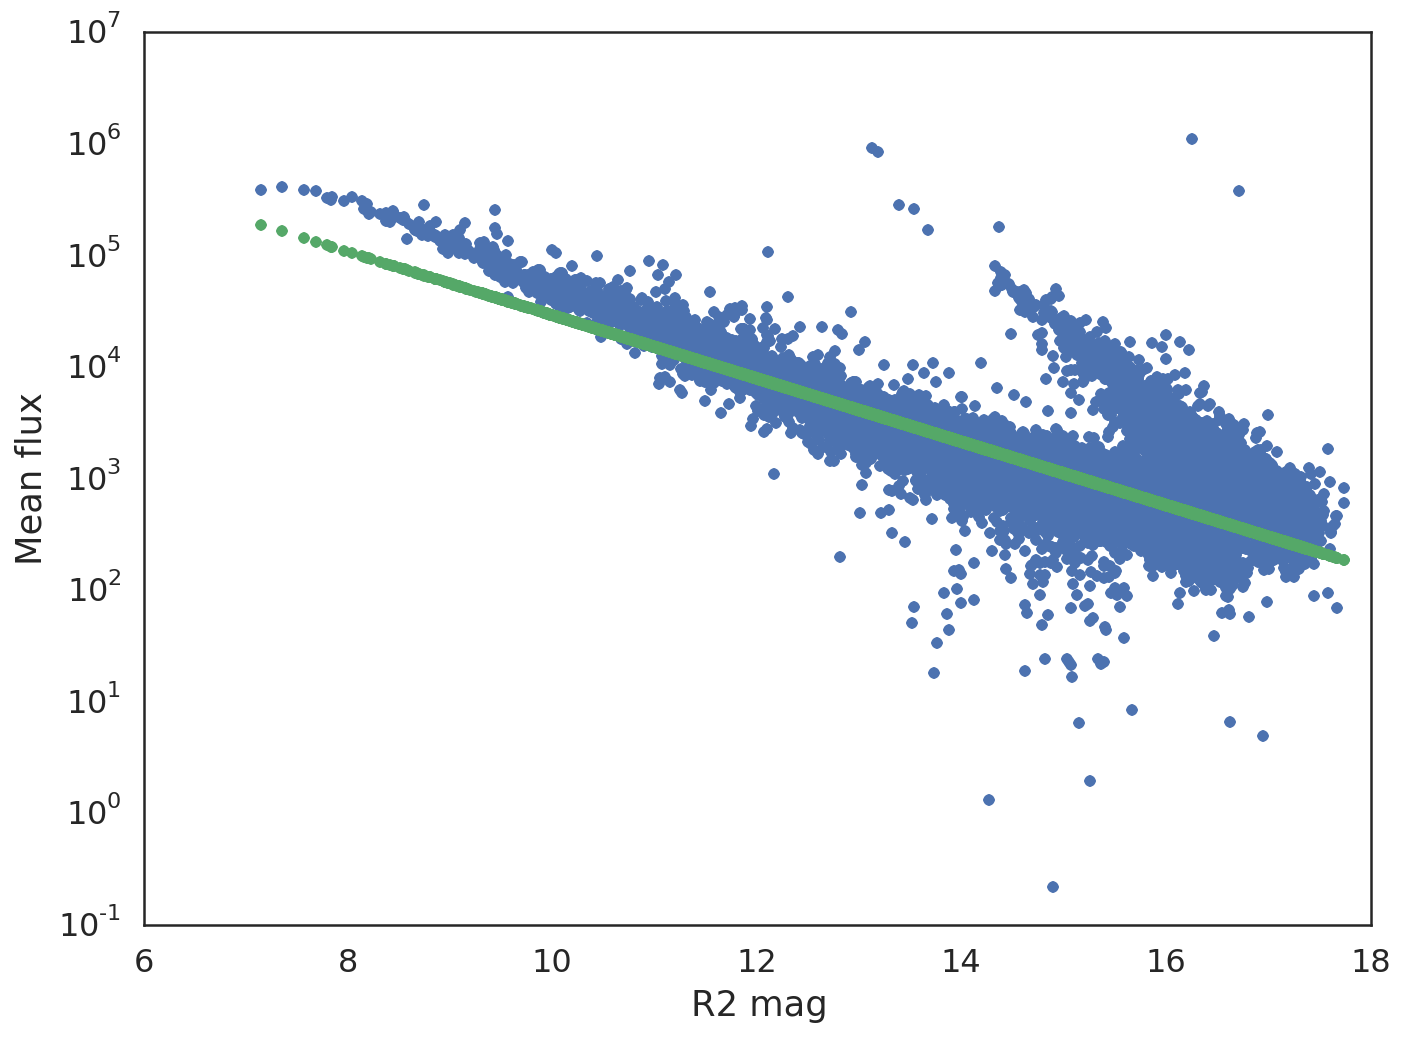

In [25]:
plt.plot(r2mag, flux_mean, '.')
plt.yscale('log')
plt.xlabel(r'R2 mag')
plt.ylabel(r'Mean flux')

ind = (np.isfinite(r2mag) & np.isfinite(flux_mean) & (flux_mean > 0))

fit = np.poly1d(np.polyfit(r2mag[ind], np.log10(flux_mean[ind]), 1))
print(fit)
plt.plot(r2mag[ind], 10 ** fit(r2mag[ind]), '.');